In [12]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/GPproject/gplib/')
import numpy as np
% load_ext autoreload
% autoreload 2
from matplotlib import pyplot as plt
% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from gplib.gpc import GPCLaplace, GPCSparse
from gplib.covfun import SE

In [14]:
dim = 2
num = 200
test_num= 100
x_tr = np.random.rand(num, dim)
if dim == 1:
    x_test = np.linspace(0, 1, test_num)
    x_test = x_test.reshape(test_num, 1)
else:
    x_test = np.random.rand(test_num, dim)

In [15]:
data_gp = GPCLaplace(SE(np.array([1., .2, .1])))

In [16]:
y_tr, y_te = data_gp.generate_data(x_tr, x_test)

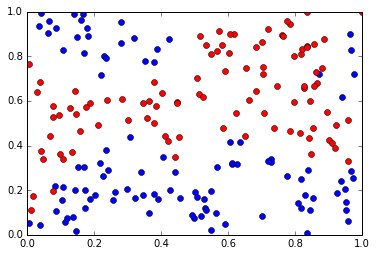

In [17]:
plt.plot(x_tr[y_tr[:, 0] == 1, 0], x_tr[y_tr[:, 0] == 1, 1], 'bo')
plt.plot(x_tr[y_tr[:, 0] == -1, 0], x_tr[y_tr[:, 0] == -1, 1], 'ro')

## Laplace

In [18]:
gp = GPCLaplace(SE(np.array([2., .5, .2])))

In [19]:
gp.fit(x_tr, y_tr, max_iter=10)

Iteration  0
Hyper-parameters at iteration  0 :  [ 3.21096408  0.46599091  0.15629835]


([array([ 3.21096408,  0.46599091,  0.15629835]),
  array([ 4.08388722,  0.42645519,  0.12864645]),
  array([ 4.71159599,  0.38044896,  0.17064383]),
  array([ 4.92222715,  0.34035677,  0.139913  ]),
  array([ 4.1612675 ,  0.28965505,  0.1363412 ]),
  array([ 3.88250229,  0.24603329,  0.13416949]),
  array([ 3.81400383,  0.22046923,  0.12231952]),
  array([ 3.8312692 ,  0.19982537,  0.1918783 ]),
  array([ 3.91533712,  0.19133814,  0.15854067]),
  array([ 3.97338076,  0.18087665,  0.14962582])],
 [0.43174004554748535,
  0.8478519916534424,
  1.4690752029418945,
  1.7939221858978271,
  2.366690158843994,
  2.8392460346221924,
  3.375296115875244,
  3.8538870811462402,
  4.378111124038696,
  4.588958024978638])

In [20]:
y_pred = gp.predict(x_test, x_tr, y_tr)

In [21]:
np.sum(y_pred == y_te)

92

## Inducing Inputs
### svi

In [22]:
gp = GPCSparse(SE(np.array([1., .7, .2])), inputs=30)

In [23]:
options = {'hermgauss_deg': 100, 'mode': 'adadelta', 'maxiter': 100, 
           'verbose': True, 'batch_size':20, 'step_rate': 0.5, 'decay': 0.8,
           'print_freq': 10}
res = gp.fit(x_tr, y_tr, method='svi', method_options=options)

Using AdaDelta optimizer
Iteration  10 :
	Gradient norm 2.31628559587
Iteration  20 :
	Gradient norm 5.43159895476
Iteration  30 :
	Gradient norm 3.85861492816
Iteration  40 :
	Gradient norm 2.00136997263
Iteration  50 :
	Gradient norm 3.61475814731
Iteration  60 :
	Gradient norm 2.97468172318
Iteration  70 :
	Gradient norm 2.94829503854
Iteration  80 :
	Gradient norm 2.55630021433
Iteration  90 :
	Gradient norm 1.73993533161
Iteration  100 :
	Gradient norm 1.9516219115


In [24]:
y_pred = gp.predict(x_test)

In [25]:
np.sum(y_pred == y_te)

86

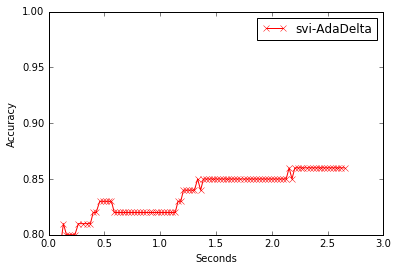

In [26]:
metric = lambda w: gp.get_prediction_quality(w, x_test, y_te)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-rx', label='svi-AdaDelta')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ

In [27]:
gp = GPCSparse(SE(np.array([1., .7, .2])), inputs=30)

In [28]:
options = {'maxfun': 5, 'disp': False, 'mydisp': True, 'num_updates':5}
res = gp.fit(x_tr, y_tr, method='vi_jj', method_options=options)

Hyper-parameters at iteration 0 : [ 1.   0.7  0.2]
Hyper-parameters at iteration 1 : [ 5.5390576   0.53022173  0.15324946]
	Hyper-parameters at outter iteration 0 : [ 5.4195564   0.44826992  0.13068302]
Hyper-parameters at iteration 0 : [ 5.4195564   0.44826992  0.13068302]
Hyper-parameters at iteration 1 : [ 5.59842498  0.34941259  0.10346144]
Hyper-parameters at iteration 2 : [ 5.61537369  0.34069187  0.07957348]
	Hyper-parameters at outter iteration 1 : [ 5.62226314  0.33814176  0.01      ]
Hyper-parameters at iteration 0 : [ 5.62226314  0.33814176  0.01      ]
Hyper-parameters at iteration 1 : [ 5.65518295  0.29611643  0.01      ]
Hyper-parameters at iteration 2 : [ 5.6479219   0.30431114  0.01      ]
	Hyper-parameters at outter iteration 2 : [ 5.64796477  0.30339168  0.01      ]
Hyper-parameters at iteration 0 : [ 5.64796477  0.30339168  0.01      ]
Hyper-parameters at iteration 1 : [ 5.66154914  0.27335903  0.01      ]
Hyper-parameters at iteration 2 : [ 5.65531625  0.2865027   0

In [29]:
y_pred = gp.predict(x_test)

In [30]:
np.sum(y_pred == y_te)

91

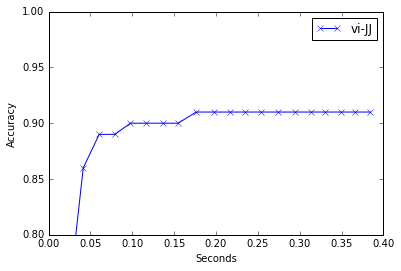

In [31]:
metric = lambda w: gp.get_prediction_quality(w, x_test, y_te)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-bx', label='vi-JJ')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-Taylor

In [32]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [33]:
options = {'maxfun': 5, 'disp': False, 'mydisp': True, 'num_updates':5}
res = gp.fit(x_tr, y_tr, method='vi_taylor', method_options=options)

Hyper-parameters at iteration 0 : [ 1.   0.5  0.2]
Hyper-parameters at iteration 1 : [ 4.3415176   0.42485812  0.17086335]
Hyper-parameters at iteration 2 : [ 4.37654883  0.52621025  0.01      ]
Hyper-parameters at iteration 3 : [ 4.17505473  0.49559041  0.01      ]
	Hyper-parameters at outter iteration 0 : [ 3.14241797  0.36992544  0.01      ]
Hyper-parameters at iteration 0 : [ 3.14241797  0.36992544  0.01      ]
Hyper-parameters at iteration 1 : [ 3.6936357   0.30790788  0.01      ]
Hyper-parameters at iteration 2 : [ 3.67123458  0.31009554  0.01      ]
	Hyper-parameters at outter iteration 1 : [ 3.66914542  0.30981042  0.01      ]
Hyper-parameters at iteration 0 : [ 3.66914542  0.30981042  0.01      ]
Hyper-parameters at iteration 1 : [ 3.92961318  0.27093075  0.01      ]
Hyper-parameters at iteration 2 : [ 3.91349283  0.27492362  0.01      ]
	Hyper-parameters at outter iteration 2 : [ 3.92135523  0.27487726  0.01      ]
Hyper-parameters at iteration 0 : [ 3.92135523  0.27487726  0

In [34]:
y_pred = gp.predict(x_test)

In [35]:
np.sum(y_pred == y_te)

89

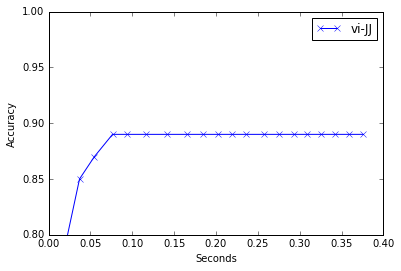

In [36]:
metric = lambda w: gp.get_prediction_quality(w, x_test, y_te)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-bx', label='vi-JJ')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ-hybrid

In [37]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [38]:
options = {'maxfun': 5, 'disp': False, 'mydisp': True, 'num_updates':5, 'max_out_iter':50}
res = gp.fit(x_tr, y_tr, method='vi_jj_hybrid', method_options=options)

Hybrid mode
	Analytic updates number:5
	 Outter iteration 0
Hyper-parameters at iteration 0 : [ 1.   0.5  0.2  1.   1. ]
Hyper-parameters at iteration 1 : [ 1.99952494  0.47524481  0.19040105  0.99924702  1.00085465]
Hyper-parameters at iteration 2 : [ 1.9695574   0.22273416  0.09248876  0.99909695  1.00201683]
	 Outter iteration 1
Hyper-parameters at iteration 0 : [ 1.94743489  0.20939195  0.07665789  1.14089892  2.35755991]
Hyper-parameters at iteration 1 : [ 2.41770914  0.19561832  0.07205329  1.14092508  2.3577203 ]
Hyper-parameters at iteration 2 : [ 2.70924598  0.22457241  0.06333428  1.1409412   2.35783442]
Hyper-parameters at iteration 3 : [ 2.83898094  0.22651444  0.05755494  1.14094989  2.35789696]
Hyper-parameters at iteration 4 : [ 2.99138588  0.2284879   0.02570717  1.14097231  2.35811731]
	 Outter iteration 2
Hyper-parameters at iteration 0 : [ 3.01411151  0.22890989  0.01        1.34920336  2.94808952]
Hyper-parameters at iteration 1 : [ 3.15007472  0.21310639  0.01     

In [39]:
y_pred = gp.predict(x_test)

In [40]:
np.sum(y_pred == y_te)

91

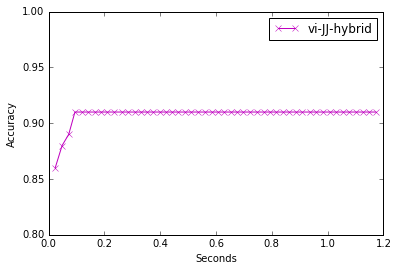

In [41]:
metric = lambda w: gp.get_prediction_quality(w, x_test, y_te)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-mx', label='vi-JJ-hybrid')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ-full

In [42]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [43]:
options = {'maxiter': 30, 'disp': False, 'mydisp': True}
res = gp.fit(x_tr, y_tr, method='vi_jj_full', method_options=options)

Standard mode
Hyper-parameters at iteration 0 : [ 1.   0.5  0.2  1.   1. ]
Hyper-parameters at iteration 1 : [ 1.99952659  0.47527362  0.19041222  0.99924726  1.00085667]
Hyper-parameters at iteration 2 : [ 1.96209278  0.22778643  0.0944478   0.99911158  1.00195702]
Hyper-parameters at iteration 3 : [ 1.94065717  0.21347317  0.07983353  0.99911558  1.00205247]
Hyper-parameters at iteration 4 : [ 1.88647815  0.21287837  0.04564     0.99914265  1.00218878]
Hyper-parameters at iteration 5 : [ 1.83487029  0.21700569  0.01        0.9991257   1.00276371]
Hyper-parameters at iteration 6 : [ 1.84643744  0.21677526  0.01        0.99910707  1.00287743]
Hyper-parameters at iteration 7 : [ 1.88320855  0.21749859  0.01        0.99903619  1.00336411]
Hyper-parameters at iteration 8 : [ 1.90043517  0.21815012  0.01        0.99896179  1.00403549]
Hyper-parameters at iteration 9 : [ 1.98449154  0.217033    0.01        0.99785346  1.01545176]
Hyper-parameters at iteration 10 : [ 2.20277433  0.21840036  

In [44]:
y_pred = gp.predict(x_test)

In [45]:
np.sum(y_pred == y_te)

90

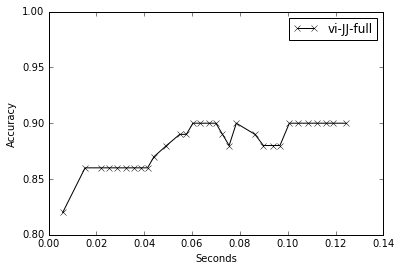

In [46]:
metric = lambda w: gp.get_prediction_quality(w, x_test, y_te, x_tr, y_tr)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-kx', label='vi-JJ-full')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')